# 07. Creando nuestro primer modelo

### Algunas cosas para leer

#### ¿Qué es un árbol de decisión?
https://www.ibm.com/es-es/topics/decision-trees

#### ¿Qué es la matriz de confusión y las métricas asociadas?
https://profesordata.com/2020/08/07/evaluando-los-modelos-de-clasificacion-en-aprendizaje-automatico-la-matriz-de-confusion-claramente-explicada/

#### ¿Qué es MLFflow?
https://anderfernandez.com/blog/tutorial-mlflow-completo/#:~:text=MLflow%20es%20una%20herramienta%20de,tal%20forma%20que%20sea%20reproducible.

## Importamos paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import pydotplus

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  

import graphviz_tools as agt
import mlflow_utils as a_mlflow_u
import tree_utils as atu

# Preparando nuestro primer modelo

## Cargamos nuestros dataset

In [2]:
file_cervezas_unicas_resumen_valores_con_clase_training = 'dataset/cervezas_unicas_resumen_valores_con_clase_train.csv'
file_cervezas_unicas_resumen_valores_con_clase_testing = 'dataset/cervezas_unicas_resumen_valores_con_clase_test.csv'

campos = ['beer_abv', 'review_aroma', 'review_appearance', 'review_taste', 'review_overall', 'review_palate', 'es_popular']

df_training_validacion = pd.read_csv(file_cervezas_unicas_resumen_valores_con_clase_training)
df_testing = pd.read_csv(file_cervezas_unicas_resumen_valores_con_clase_testing)

df_training_validacion = df_training_validacion.loc[:, campos]
df_testing = df_testing.loc[:, campos]

df_training_validacion.head()

,beer_abv,review_aroma,review_appearance,review_taste,review_overall,review_palate,es_popular
0,6.0,3.564000,3.736000,3.592000,3.776000,3.620000,NO
1,4.5,2.608108,3.351351,2.743243,2.945946,3.054054,NO
2,4.4,3.727273,3.727273,3.545455,3.545455,3.545455,NO
3,7.5,3.750000,3.500000,3.750000,3.750000,4.000000,NO
4,7.8,2.500000,3.500000,3.500000,3.500000,3.500000,NO


## Separamos en training y validacion

![image info](./img-doc/Datasets.png)

In [3]:
random_state = 1
test_size = 0.3

atributos = ['beer_abv', 'review_aroma', 'review_appearance', 'review_taste', 'review_overall', 'review_palate']
clase = ['es_popular']

Y_df_training_validacion = df_training_validacion.loc[:, clase]
df_training_validacion = df_training_validacion.loc[:, atributos]

X_train, X_validacion, Y_train, Y_validacion = train_test_split(
    df_training_validacion, 
    Y_df_training_validacion, 
    test_size=test_size, 
    random_state=random_state
)

### Tambien abrimos en X e Y el dataset de testing

In [4]:
X_testing = df_testing.loc[:, atributos]
Y_testing = df_testing.loc[:, clase]

## Generamos nuestro primer modelo

In [6]:
max_depth = 4
criterion='gini'
clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            random_state=1
        )
_ = clf.fit(X_train, Y_train)


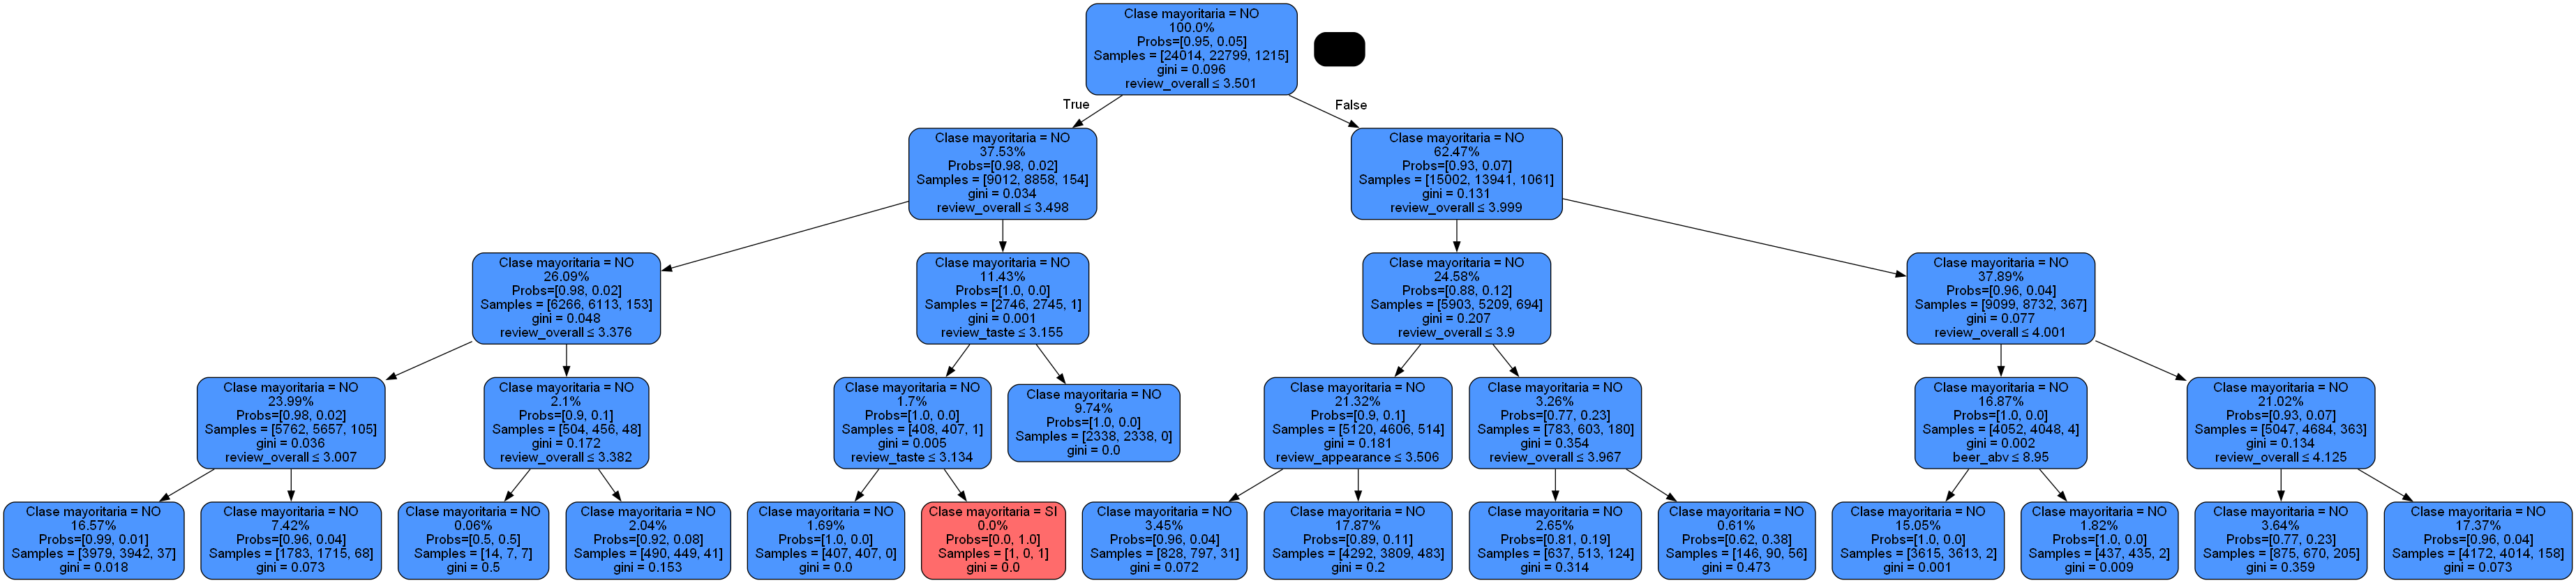

In [7]:
dot_data_value = agt.crear_arbol(clf, negative_class = 'NO', positive_class = 'SI', umbral = 0.5)

graph = pydotplus.graph_from_dot_data(dot_data_value)  
graph.set_size('"50,50"')
graph.write_png('img/modelo_1.png')
Image(graph.create_png())

## Entendiendo cómo se particionan los datos

### Gini index

$\Large Ig=1-\sum_{j=1}^{c} (p_j)^2$


In [8]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
impurity = clf.tree_.impurity
node_samples = clf.tree_.n_node_samples

df_clases_en_nodo = pd.DataFrame(
    clf.tree_.value.reshape(clf.tree_.node_count,clf.tree_.max_n_classes), columns = clf.classes_).astype(int)

df_tree = pd.DataFrame(
                        { 
                            'children_left': children_left,
                            'children_right': children_right,
                            'feature': feature,
                            'threshold': threshold,
                            'impurity': impurity ,
                            'node_samples': node_samples
                        })

df_tree = pd.concat([df_tree, df_clases_en_nodo], axis="columns")

df_tree

,children_left,children_right,feature,threshold,impurity,node_samples,NO,SI
0,1,14,4,3.500828,0.096071,24014,22799,1215
1,2,9,4,3.498377,0.033593,9012,8858,154
2,3,6,4,3.376341,0.047643,6266,6113,153
3,4,5,4,3.006854,0.035782,5762,5657,105
4,-1,-1,-2,-2.000000,0.018425,3979,3942,37
5,-1,-1,-2,-2.000000,0.073367,1783,1715,68
6,7,8,4,3.382259,0.172336,504,456,48
7,-1,-1,-2,-2.000000,0.500000,14,7,7
8,-1,-1,-2,-2.000000,0.153344,490,449,41
9,10,13,3,3.154514,0.000728,2746,2745,1


In [9]:
nodo_raiz_idx = 0
atu.get_informacion_de_nodo(clf.tree_, nodo_raiz_idx)

{'samples_nodo': 24014,
 'samples_nodo_izquierdo': 9012,
 'samples_nodo_derecho': 15002,
 'proporcion_samples_nodo_izquierdo': 0.38,
 'proporcion_samples_nodo_derecho': 0.62,
 'entropia_nodo': 0.0961,
 'entropia_nodo_izquierdo': 0.0336,
 'entropia_nodo_derecho': 0.1314,
 'information_gain': 0.0013}

## Analizamos los resultados con el dataset de validacion

#### Matriz de confusión

In [10]:
Y_validacion_pred = clf.predict(X_validacion)

df_matriz_confusion = Y_validacion.copy()
df_matriz_confusion.columns = ['real']
df_matriz_confusion['prediccion'] = Y_validacion_pred

df_matriz_confusion.groupby(by=['real', 'prediccion']).size().reset_index(name='counts')

,real,prediccion,counts
0,NO,NO,9786
1,NO,SI,1
2,SI,NO,506


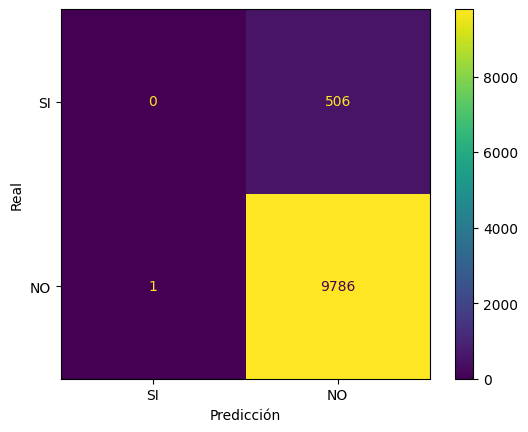

In [11]:
cm = confusion_matrix(Y_validacion, Y_validacion_pred, labels=['SI', 'NO'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

### Calculando métricas

In [12]:
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]

[true_positives, false_positives, true_negatives, false_negatives]

[0, 1, 9786, 506]

#### Accuracy
(tp + tn) / (tp + tn + fp + fn)

Es el porcentaje total de elementos clasificados correctamente.

In [13]:
accuracy = (true_positives+true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
accuracy

0.9507432235499854

#### Recall 
(tp ) / (tp + fn)

Es el número de elementos identificados correctamente como positivos del total de positivos verdaderos.

In [14]:
recall = (true_positives) / (true_positives + false_negatives)
recall

0.0

#### Precision 
(tp ) / (tp + fp)

Es el número de elementos identificados correctamente como positivos de un total de elementos identificados como positivos.


In [15]:
precision = (true_positives) / (true_positives + false_positives)
precision

0.0

#### Especificidad
(tn ) / (tn + fp)

Es el número de ítems correctamente identificados como negativos  de un total de elementos identificados como negativos.

In [16]:
specificity = (true_negatives) / (true_negatives + false_positives)
specificity

0.9998978236436089

#### Tasa de falso positivo (error tipo 1)
(fp)/(fp + tn)

Número de elementos identificados erróneamente como positivos de total negativos verdaderos- FP / ( FP + TN)

In [17]:
tasa_falso_positivo = (false_positives) / (true_negatives + false_positives)
tasa_falso_positivo

0.00010217635639113109

#### Tasa de falso negativo (error tipo 2)
(fn)/(fn + tp)

Número de elementos identificados erróneamente como s negativo del total de verdaderos positivos

In [18]:
tasa_falso_negativo = (false_negatives) / (true_negatives + false_positives)
tasa_falso_negativo

0.05170123633391233

#### F1
2 * (precision * recall) / (precision + recall)

Es la media armónica de la precicisión y el recall

In [19]:
f1 = 2 * (precision*recall)/(precision+recall)
f1

C:\Users\arouiller\AppData\Local\Temp\ipykernel_3956\1137257253.py:1: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision*recall)/(precision+recall)


nan

#### Una Metrica del negocio

$4000 por cada verdadero positivo

-$200 por cada falso positivo

dividido por el total de positivos (true_positives + false_negatives)

In [20]:
metrica_negocio_optima = (4000*(true_positives+false_negatives)) /(true_positives + false_negatives)
metrica_negocio_optima

4000.0

In [21]:
metrica_negocio = ((4000*true_positives) - (200*false_positives))/(true_positives + false_negatives)
metrica_negocio

-0.3952569169960474

In [22]:
metricas = atu.calcular_metricas(
    y_true = Y_validacion, 
    y_pred = Y_validacion_pred, 
    labels = ['NO', 'SI']
)

metricas

{'true negatives': 9786,
 'true positives': 0,
 'false positives': 1,
 'false negatives': 506,
 'accuracy': 0.9507,
 'recall': 0.0,
 'precision': 0.0,
 'specificity': 0.9999,
 'tasa falso positivo': 0.0001,
 'tasa falso negativo': 0.0517,
 'f1': 0,
 'metrica negocio': -0.3952569169960474,
 'metrica optima negocio': 4000.0}

In [23]:
parametros = {
    'max_depth': max_depth,
    'umbral_corte': 0.5
}

a_mlflow_u.log_experimento(
    host = 'http://localhost:5000', 
    nombre_experimento="AnalisisDeCervezas", 
    run_name="Primera ejecucion", 
    descripcion="Rpart con parámetros por defecto", 
    dataset_tag="validacion", 
    parametros=parametros, 
    metricas=metricas,
    model=clf, 
    artifact_path="model"
)

C:\Users\arouiller\AppData\Local\miniconda3\envs\python_3_9_beer_analysis\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### Probemos con el dataset de testing

In [24]:
y_testing_pred = clf.predict(X_testing)

In [25]:
metricas = atu.calcular_metricas(
    y_true = Y_testing['es_popular'], 
    y_pred = y_testing_pred, 
    labels = ['NO', 'SI']
)
metricas

{'true negatives': 13965,
 'true positives': 0,
 'false positives': 1,
 'false negatives': 738,
 'accuracy': 0.9497,
 'recall': 0.0,
 'precision': 0.0,
 'specificity': 0.9999,
 'tasa falso positivo': 0.0001,
 'tasa falso negativo': 0.0528,
 'f1': 0,
 'metrica negocio': -0.27100271002710025,
 'metrica optima negocio': 4000.0}

In [26]:
parametros = {
    'max_depth': max_depth,
    'umbral_corte': 0.5
}

a_mlflow_u.log_experimento(
    host = 'http://localhost:5000', 
    nombre_experimento="AnalisisDeCervezas", 
    run_name="Primera ejecucion", 
    descripcion="Rpart con parámetros por defecto", 
    dataset_tag="testing", 
    parametros=parametros, 
    metricas=metricas,
    model=clf, 
    artifact_path="model"
)